## Keras plus TensorFlow
### Installation Instructions

* Keras https://keras.io/#installation
### Task: There are diabetics dataset example. Do the same with Iris dataset or your project data


### Codebook
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [1]:
# Create first network with Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets


import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
# dataset = numpy.loadtxt("iris.csv", delimiter=",")
iris = datasets.load_iris()
# split into input (X) and output (Y) variables
X = iris.data
Y = iris.target
Y = keras.utils.to_categorical(Y)

# create model
model = Sequential()
model.add(Dense(12, input_dim=4, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(3, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2)
# calculate predictions
predictions = model.predict(X)

# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

Using TensorFlow backend.
C:\Users\Amze\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=4, activation="relu", kernel_initializer="uniform")`
C:\Users\Amze\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
C:\Users\Amze\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/150
 - 0s - loss: 0.6922 - acc: 0.6511
Epoch 2/150
 - 0s - loss: 0.6900 - acc: 0.6667
Epoch 3/150
 - 0s - loss: 0.6869 - acc: 0.6667
Epoch 4/150
 - 0s - loss: 0.6816 - acc: 0.6667
Epoch 5/150
 - 0s - loss: 0.6723 - acc: 0.6667
Epoch 6/150
 - 0s - loss: 0.6580 - acc: 0.6667
Epoch 7/150
 - 0s - loss: 0.6414 - acc: 0.6667
Epoch 8/150
 - 0s - loss: 0.6266 - acc: 0.6667
Epoch 9/150
 - 0s - loss: 0.6164 - acc: 0.6667
Epoch 10/150
 - 0s - loss: 0.6070 - acc: 0.6667
Epoch 11/150
 - 0s - loss: 0.5950 - acc: 0.6667
Epoch 12/150
 - 0s - loss: 0.5816 - acc: 0.6667
Epoch 13/150
 - 0s - loss: 0.5653 - acc: 0.6667
Epoch 14/150
 - 0s - loss: 0.5453 - acc: 0.6667
Epoch 15/150
 - 0s - loss: 0.5241 - acc: 0.6844
Epoch 16/150
 - 0s - loss: 0.5014 - acc: 0.7622
Epoch 17/150
 - 0s - loss: 0.4770 - acc: 0.7778
Epoch 18/150
 - 0s - loss: 0.4520 - acc: 0.7911
Epoch 19/150
 - 0s - loss: 0.4283 - acc: 0.8756
Epoch 20/150
 - 0s - loss: 0.4075 - acc: 0.8822
Epoch 21/150
 - 0s - loss: 0.3882 - acc: 0.8733
E

In [2]:
predicted = model.predict_classes(X)
print(predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [83]:
arr = [{},{},{}]

for i in range(3):
    for j in range(3):
        arr[i][j] = 0

for i in range(len(predicted)):
    arr[iris.target[i]][predicted[i]] = arr[iris.target[i]][predicted[i]] + 1
arr

[{0: 50, 1: 0, 2: 0}, {0: 0, 1: 48, 2: 2}, {0: 0, 1: 1, 2: 49}]

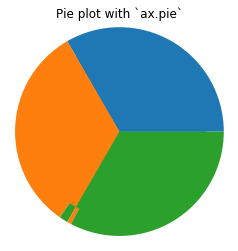

In [84]:
from matplotlib import pyplot as plt
import numpy as np

a1 = f[0]

vals = np.array([[arr[0][0], arr[0][1], arr[0][2], 0], [arr[1][0], arr[1][1], arr[1][2], 0], [arr[2][0], arr[2][1], arr[2][2], 0]])
fig, ax = plt.subplots()
ax.pie(vals.flatten(), radius=1.2,
       colors=plt.rcParams["axes.prop_cycle"].by_key()["color"][:vals.shape[1]])
ax.pie(vals.sum(axis=1), radius=1)
ax.set(aspect="equal", title='Pie plot with `ax.pie`')

plt.show()